# -----------------------------------------------------------------------------------------------
# Name:  Tessa Ayvazoglu                                       
# ID:  8686601 
# Date: 16/02/2024
# -----------------------------------------------------------------------------------------------
# Program: CSCN8010-24W-Sec1to2-Foundations of Machine Learning
# Lab 6 - Logistic Regression
# ----------------------------------------------------------------------------------------------
# Goal: classify the species of an Iris flower given the dimensions of parts of the flower. The classification is binary, there are two classes: virginica and non-virginica.  
# ----------------------------------------------------------------------------------------------
# Recap: 
# ----------------------------------------------------------------------------------------------
# Scenarios:
*  Obtain the data using the sklearn load_iris method. Redefine 2 classes for the target variable: virginica and non-virginica (the original dataset includes 3 classes).
*  Explore the data (1.5 point):
    * 1 table with descriptive statistics for each of the two classes.
    * 1 Histogram per feature, for each of the two classes. See https://seaborn.pydata.org/generated/seaborn.histplot.html and consider using the `hue` argument to distinguish between classes in the same graph.
    * Correlation matrix between the four features
    * At least 3 additional graphs. Use Kaggle for inspiration: go over the notebooks of that dataset, and choose graphs that you find most relevant for the problem statement. Add a reference (as a link) to the source of each graph. Explain (to the PM) what is the meaning of this graph, what can we learn from it.
    * At least 3 insights .
* Split the data to a train set (120 records), a validation set (15 records)  and a test set (15 records).
* Run four logistic regression models models, with 1,2,3 and 4 features. Choose the order in random, or based on some reasoning (1 point).
* Evaluate the models on the validation set:
    * Use the predict and predict_proba methods to list in a table how well each model is doing for each of the instances in the validation set. There should be one table per model. Each table should have four columns: instance number, probability of predicting verginica, actual prediction by the model, ground truth. (0.5 point) Next, summarize the data in each table to a single measure (number) per model. What would you use? (0.5 point)
    * Plot the decision boundary for three models (with 1, 2 and 3 features; 3 plots), together with the validation data. Tip: using Plotly will allow you to rotate the 3D graph with the 3 features. Tip: for the code required to find the decision boundary you can look at this notebook in the course repository (1 point)
    * Failure modes: using the two preceding steps, in which types of data instances is each model wrong? Can you identify some failure patterns within a model or across models? (1 point)
* Recommend the best model (provide reasoning). Summarize the results of this model on the test set. Tip: you can use the "single-number" measure you used on the validation set (0.5 point)
* ---------------------------------------------------------------------------------------------

##### 1)  Obtain the data using the sklearn load_iris method. Redefine 2 classes for the target variable: virginica and non-virginica (the original dataset includes 3 classes).

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

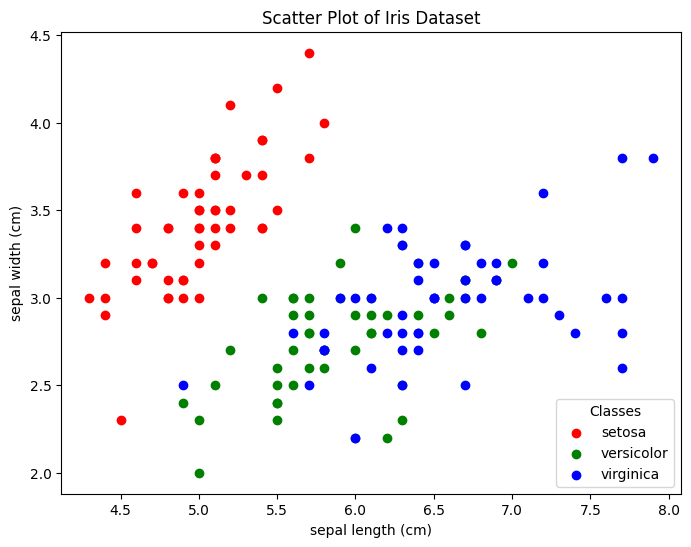

In [39]:
# Create a custom color array for each class
colors = ['red', 'green', 'blue']  # Example colors, you can choose your own

# Create a scatter plot with custom colors for each class
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.scatter(iris.data[iris.target == i, 0], iris.data[iris.target == i, 1], c=colors[i], label=iris.target_names[i])

# Set labels and title
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Scatter Plot of Iris Dataset")

# Add legend with custom labels and colors
plt.legend(loc="lower right", title="Classes")

# Show plot
plt.show()

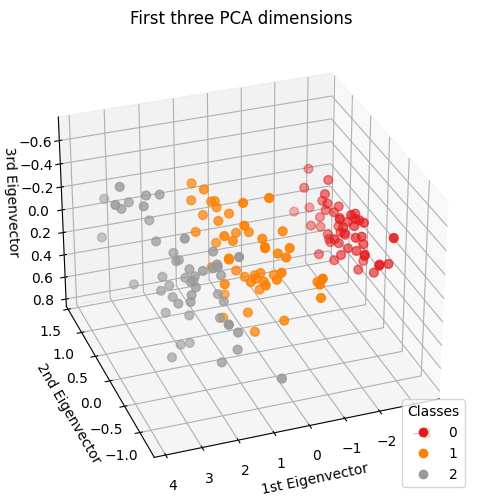

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Create a PCA model to reduce the dimensionality to 3
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(iris.data)

# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    cmap=plt.cm.Set1,
    s=40,
)
ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
ax.set_zlabel("3rd Eigenvector")
ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
plt.show()

##### 1)  Obtain the data using the sklearn load_iris method. Redefine 2 classes for the target variable: virginica and non-virginica (the original dataset includes 3 classes).

In [150]:
#import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris

# Load the iris dataset
#iris = load_iris()
# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap='viridis')
# plt.xlabel(iris.feature_names[0])
# plt.ylabel(iris.feature_names[1])
# plt.title("Scatter Plot of Iris Dataset")
# legend = plt.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
# plt.annotate(iris.feature_names[0], xy=(0.5, -0.1), xycoords='axes fraction', ha='center', va='center')
# plt.show()

In [151]:
# Concatenate the features and target into a single DataFrame
df = pd.concat([pd.DataFrame(iris.data, columns=iris.feature_names), pd.DataFrame(iris.target, columns=['target'])], axis=1)


# Rename the columns
df.columns = iris.feature_names + ['target']

# Define the target classes (virginica and non-virginica)
virginica_class = 2
non_virginica_class = [0, 1]  # Indices for classes 0 and 1

# Filter the DataFrame to include only samples corresponding to the defined classes
virginica_df = df[df['target'] == virginica_class]
non_virginica_df = df[df['target'].isin(non_virginica_class)]

# Display descriptive statistics for each of the two classes
print("Descriptive Statistics for Virginica Class:")
print(virginica_df.describe())

print("\nDescriptive Statistics for Non-Virginica Class:")
print(non_virginica_df.describe())

Descriptive Statistics for Virginica Class:
       sepal length (cm)  sepal width (cm)  petal length (cm)   
count           50.00000         50.000000          50.000000  \
mean             6.58800          2.974000           5.552000   
std              0.63588          0.322497           0.551895   
min              4.90000          2.200000           4.500000   
25%              6.22500          2.800000           5.100000   
50%              6.50000          3.000000           5.550000   
75%              6.90000          3.175000           5.875000   
max              7.90000          3.800000           6.900000   

       petal width (cm)  target  
count          50.00000    50.0  
mean            2.02600     2.0  
std             0.27465     0.0  
min             1.40000     2.0  
25%             1.80000     2.0  
50%             2.00000     2.0  
75%             2.30000     2.0  
max             2.50000     2.0  

Descriptive Statistics for Non-Virginica Class:
       sepal le

1 Histogram per feature, for each of the two classes. See https://seaborn.pydata.org/generated/seaborn.histplot.html and consider using the `hue` argument to distinguish between classes in the same graph.

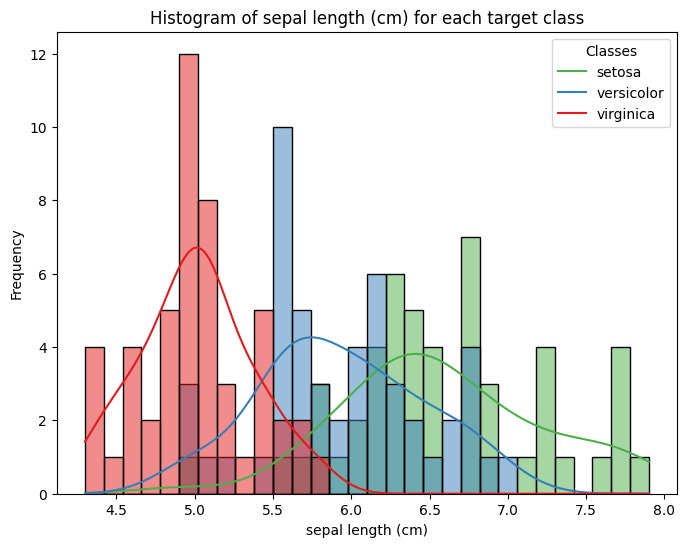

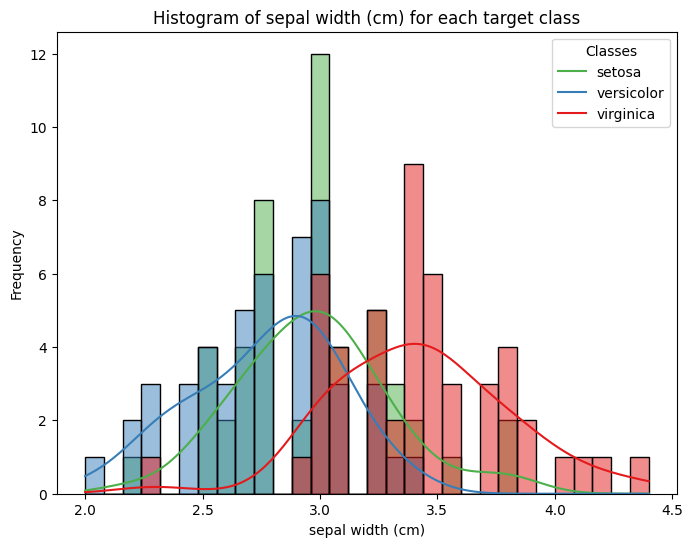

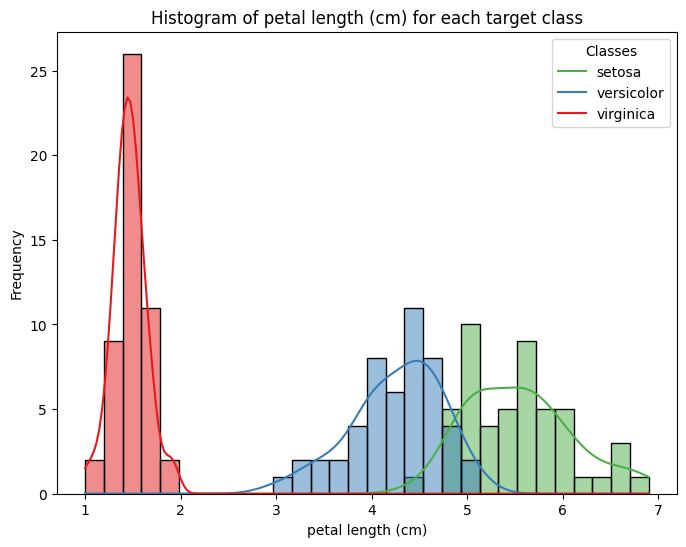

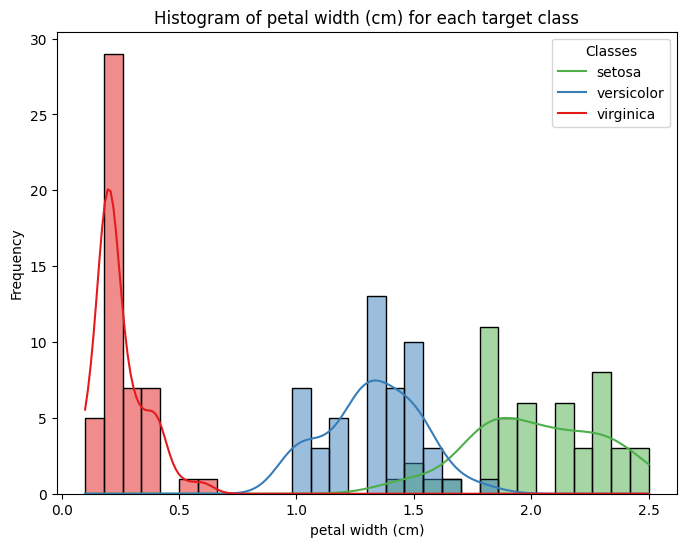

In [57]:

# Load the iris dataset
iris = load_iris()

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Define the target classes (virginica and non-virginica)
target_names = ['setosa', 'versicolor', 'virginica']
virginica_class = 2
non_virginica_class = [0, 1]  # Indices for classes 0 and 1

# Filter the DataFrame to include only samples corresponding to the defined classes
virginica_df = df[df['target'] == virginica_class]
non_virginica_df = df[df['target'].isin(non_virginica_class)]

# Create histograms for each feature, with hue as target class
for feature in iris.feature_names:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='target', bins=30, kde=True, palette='Set1')
    plt.title(f'Histogram of {feature} for each target class')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(target_names, title='Classes')
    plt.show()

* Correlation matrix between the four features


Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)   
sepal length (cm)           1.000000         -0.117570           0.871754  \
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


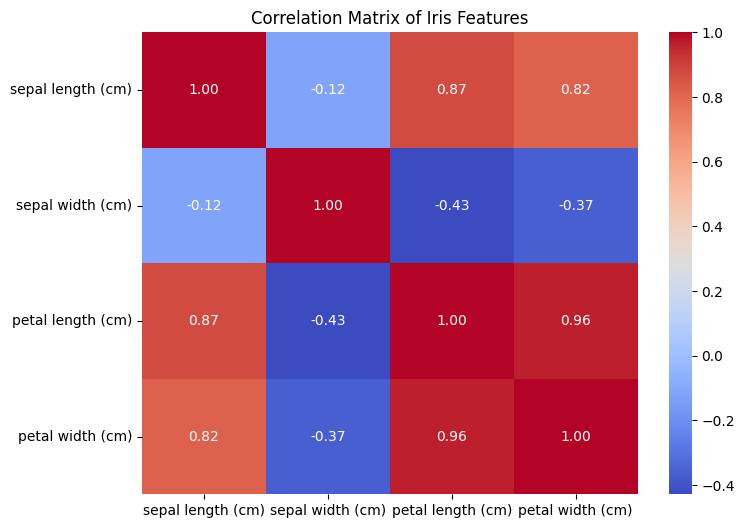

In [68]:

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Iris Features')
plt.show()

    * At least 3 additional graphs. Use Kaggle for inspiration: go over the notebooks of that dataset, and choose graphs that you find most relevant for the problem statement. Add a reference (as a link) to the source of each graph. Explain (to the PM) what is the meaning of this graph, what can we learn from it.

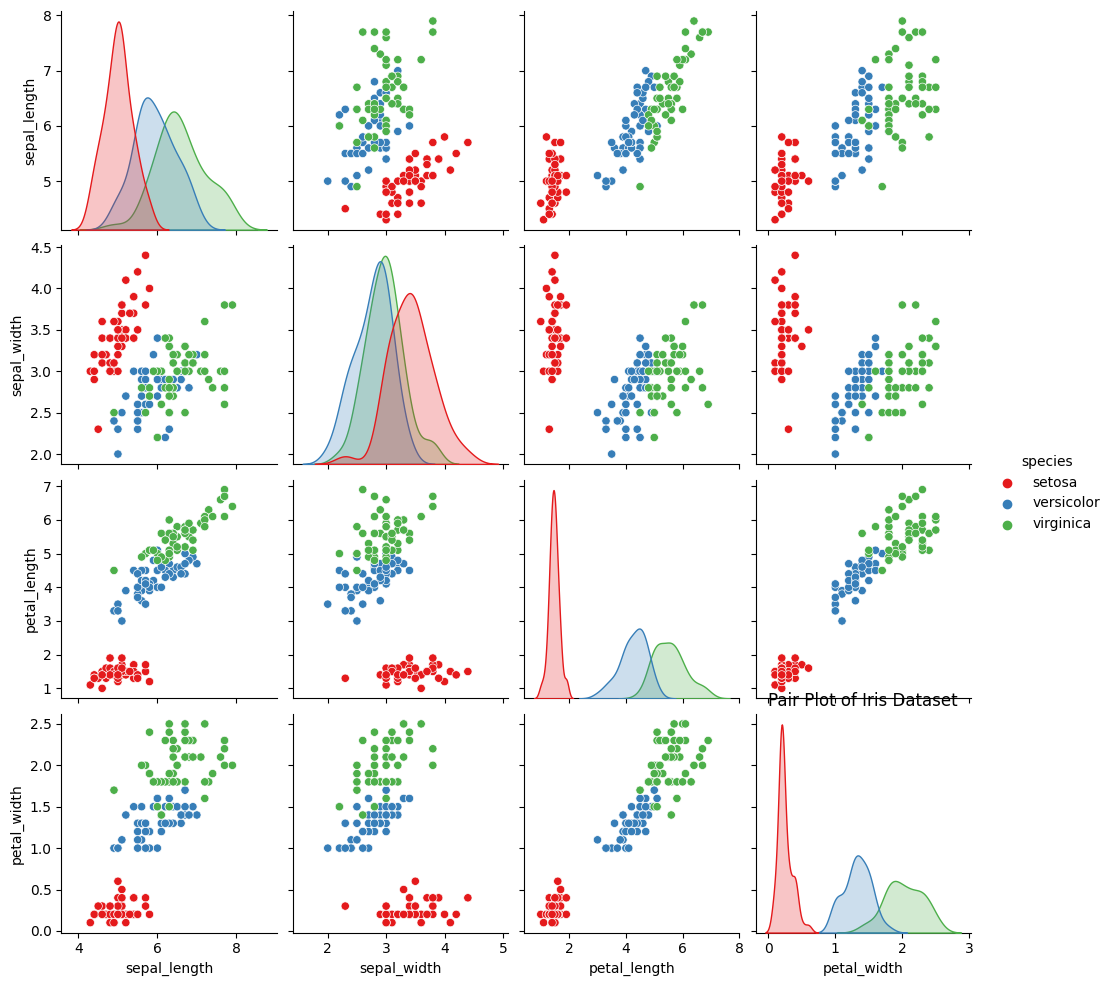

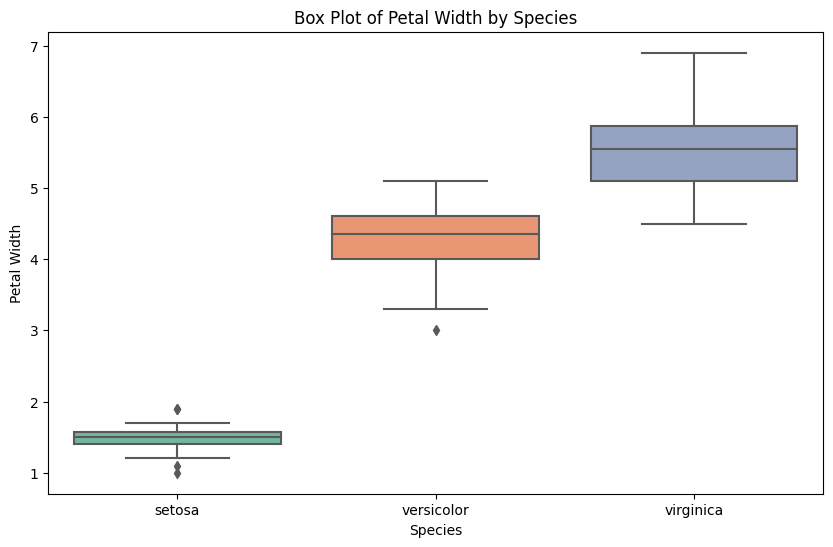

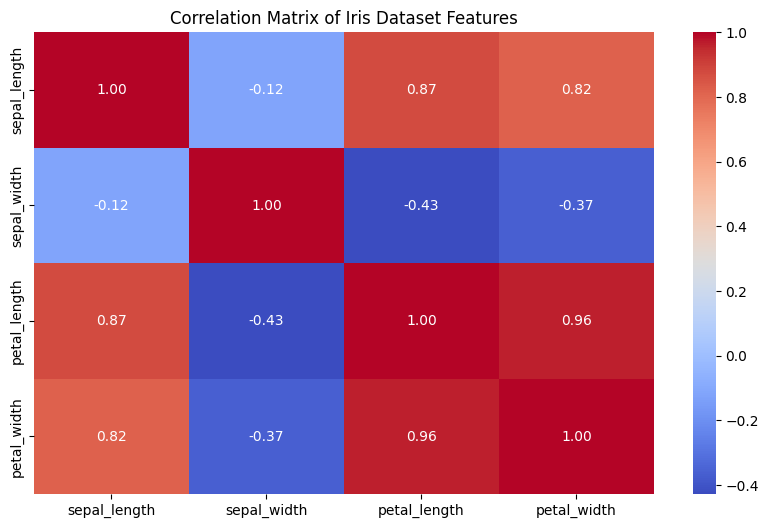

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
df = sns.load_dataset("iris")

# Pair Plot
sns.pairplot(df, hue="species", palette="Set1")
plt.title("Pair Plot of Iris Dataset")
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=df, palette="Set2")
plt.title("Box Plot of Petal Width by Species")
plt.xlabel("Species")
plt.ylabel("Petal Width")
plt.show()

# # Violin Plot
# plt.figure(figsize=(10, 6))
# sns.violinplot(x="species", y="petal_width", data=df, palette="Set3")
# plt.title("Violin Plot of Petal Width by Species")
# plt.xlabel("Species")
# plt.ylabel("Petal Width (cm)")
# plt.show()

# Drop non-numeric columns (e.g., 'species')
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Iris Dataset Features")
plt.show()

 * At least 3 insights:
  * Pair Plot:

        * This plot shows scatterplots of all pairs of features in the Iris dataset.
        * Each point represents an Iris flower, and its position on the plot is determined by two features (e.g., petal length vs. petal width).
        * Insights:
        * Different species of Iris flowers tend to cluster together based on their features, suggesting that certain combinations of features can help distinguish between species.
        * For example, setosa flowers generally have smaller petals compared to versicolor and virginica, which have overlapping petal sizes.

  * Box Plot:

        * This plot displays the distribution of petal lengths for each species of Iris flower.
        * The box represents the interquartile range (IQR), while the whiskers extend to the smallest and largest values within 1.5 times the IQR from the first and third quartiles.
        * Insights:
        * Setosa flowers typically have shorter petal lengths and narrower ranges compared to versicolor and virginica.
        * Versicolor and virginica have similar median petal lengths, but versicolor tends to have slightly shorter petals on average compared to virginica.


<!-- Violin Plot:

This plot provides a combination of a box plot and a kernel density plot, showing the distribution of petal widths for each species of Iris flower.
The width of the "violin" represents the probability density at different values.
Insights:
Setosa flowers have a narrower range of petal widths compared to versicolor and virginica.
Versicolor and virginica have similar distributions of petal widths, with some overlap between the species.
The widest part of the violin plot indicates where the majority of the data points lie for each species. -->

  * Correlation Matrix Heatmap:

        * This heatmap visualizes the strength and direction of the linear relationship between pairs of numerical features in the Iris dataset.
        * Each cell in the heatmap represents the correlation coefficient between two features, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).
        * Insights:
        * Petal length and petal width have a strong positive correlation, meaning that as one of these features increases, the other tends to increase as well.
        * Sepal length and width also show a positive correlation, but it is weaker compared to the correlation between petal length and width.
        * There is relatively weaker correlation between sepal and petal features, indicating less association between these sets of features.


* Split the data to a train set (120 records), a validation set (15 records)  and a test set (15 records).

In [157]:
from sklearn.model_selection import train_test_split

# Split the original dataset into train and temporary dataset (remaining)
X_train, X_temp, y_train, y_temp = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Split the temporary dataset into validation and test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (120, 4) (120,)
Validation set shape: (15, 4) (15,)
Test set shape: (15, 4) (15,)


* Run four logistic regression models models, with 1,2,3 and 4 features. Choose the order in random, or based on some reasoning (1 point).

In [158]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the number of features
num_features = 4
features = range(num_features)

# Initialize lists to store the results
models = []
accuracies = []

# Iterate over different combinations of features
for num_feat in range(1, num_features + 1):
    for feat_comb in combinations(features, num_feat):
        # Extract features based on the combination
        X_train_subset = X_train[:, feat_comb]
        X_val_subset = X_val[:, feat_comb]
        X_test_subset = X_test[:, feat_comb]
        #X_train_subset, X_val_subset,  X_test_subset = train_test_split(X, y, random_state=42)
        
        # Train logistic regression model
        model = LogisticRegression(random_state=42)
        model.fit(X_train_subset, y_train)
        
        # Evaluate model on validation set
        y_pred = model.predict(X_val_subset)
        accuracy = accuracy_score(y_val, y_pred)
        
        # Store the model and accuracy
        models.append((model, feat_comb))
        accuracies.append(accuracy)

# Find the index of the best model based on accuracy
best_model_idx = accuracies.index(max(accuracies))
best_model, best_features = models[best_model_idx]

# Evaluate best model on test set
X_test_best = X_test[:, best_features]
y_pred_best = best_model.predict(X_test_best)
test_accuracy = accuracy_score(y_test, y_pred_best)

print("Best model features:", best_features)
print("Validation accuracy of the best model:", max(accuracies))
print("Test accuracy of the best model:", test_accuracy)

Best model features: (2,)
Validation accuracy of the best model: 1.0
Test accuracy of the best model: 1.0


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

* Evaluate the models on the validation set:
    * Use the predict and predict_proba methods to list in a table how well each model is doing for each of the instances in the validation set. There should be one table per model. Each table should have four columns: instance number, probability of predicting verginica, actual prediction by the model, ground truth. (0.5 point) 

In [159]:

for model, features in models:
    # Extract features for validation set based on the model's features
    X_val_subset = X_val[:, features]
    y_pred_prob = model.predict_proba(X_val_subset)[:, 1]  
    y_pred = model.predict(X_val_subset)  
    
    result_df = pd.DataFrame({
        'Instance Number': range(1, len(X_val_subset) + 1),
        'Probability of predicting verginica': y_pred_prob,
        'actual prediction by the model': y_pred,
        'Ground Truth': y_val
    })
    

# Print results for each model
for i, result_df in enumerate(results):
    print(f"Results for Model {i + 1}:")
    print(result_df)
    print()

Results for Model 1:
Instance Number

Results for Model 2:
Probability of Virginica

Results for Model 3:
Predicted Class

Results for Model 4:
Ground Truth



* Next, summarize the data in each table to a single measure (number) per model. What would you use? (0.5 point)
    * Plot the decision boundary for three models (with 1, 2 and 3 features; 3 plots), together with the validation data. Tip: using Plotly will allow you to rotate the 3D graph with the 3 features. Tip: for the code required to find the decision boundary you can look at this notebook in the course repository (1 point)
    

Validation accuracy for model with features [0]: 0.8666666666666667
Validation accuracy for model with features [1, 2]: 1.0
Validation accuracy for model with features [2, 3]: 1.0
Validation accuracy for model with features [0, 1, 2, 3]: 1.0


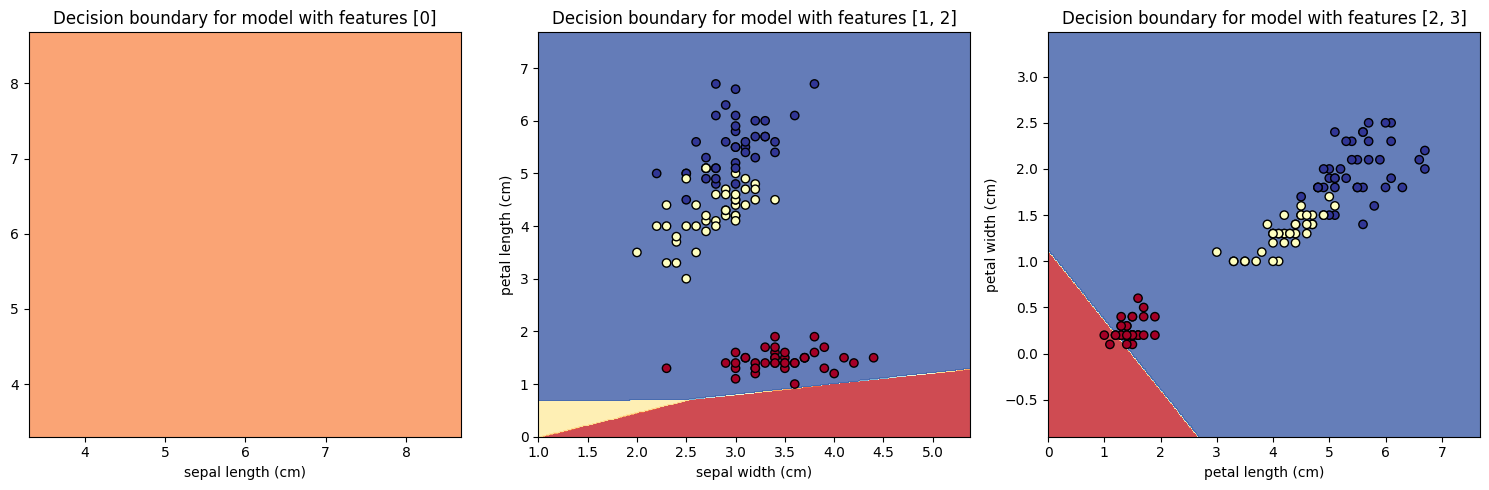

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define logistic regression models with different numbers of features
models = [
    (LogisticRegression(random_state=42), [0]),
    (LogisticRegression(random_state=42), [1, 2]),
    (LogisticRegression(random_state=42), [2, 3]),
    (LogisticRegression(random_state=42), [0, 1, 2, 3])
]

# Train the models
for model, features in models:
    model.fit(X_train_scaled[:, features], y_train)

# Evaluate the models on the validation set
for model, features in models:
    y_pred = model.predict(X_val_scaled[:, features])
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Validation accuracy for model with features {features}: {accuracy}")

# Plot decision boundaries for models with 1, 2, and 3 features
plt.figure(figsize=(15, 5))
for i, (model, features) in enumerate(models[:3], 1):
    plt.subplot(1, 3, i)
    h = .02  # step size in the mesh
    x_min, x_max = X_train.iloc[:, features[0]].min() - 1, X_train.iloc[:, features[0]].max() + 1
    y_min, y_max = X_train.iloc[:, features[-1]].min() - 1, X_train.iloc[:, features[-1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    if len(features) == 1:
        Z = model.predict(np.c_[xx.ravel()])
    elif len(features) == 2:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    if len(features) >= 2:
        plt.scatter(X_train.iloc[:, features[0]], X_train.iloc[:, features[1]], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='k')
        plt.ylabel(iris.feature_names[features[1]])
    plt.xlabel(iris.feature_names[features[0]])
    plt.title(f"Decision boundary for model with features {features}")

plt.tight_layout()
plt.show()

* Failure modes: using the two preceding steps, in which types of data instances is each model wrong? Can you identify some failure patterns within a model or across models? (1 point)


In [161]:
# Define a function to identify failure modes
def identify_failure_modes(models, X_data, y_data):
    failure_modes = {}
    for model, features in models:
        y_pred = model.predict(X_data[:, features])
        misclassified_indices = np.where(y_pred != y_data)[0]
        failure_modes[(str(model), str(features))] = set(y_pred[misclassified_indices])
    return failure_modes

# Call the function to identify failure modes
failure_modes = identify_failure_modes(models, X_val_scaled, y_val)

# Print failure modes
for key, value in failure_modes.items():
    print(f"Model: {key[0]}, Features: {key[1]}, Misclassified Classes: {value}")

Model: LogisticRegression(random_state=42), Features: [0], Misclassified Classes: {1}
Model: LogisticRegression(random_state=42), Features: [1, 2], Misclassified Classes: set()
Model: LogisticRegression(random_state=42), Features: [2, 3], Misclassified Classes: set()
Model: LogisticRegression(random_state=42), Features: [0, 1, 2, 3], Misclassified Classes: set()


* Recommend the best model (provide reasoning). Summarize the results of this model on the test set. Tip: you can use the "single-number" measure you used on the validation set (0.5 point)


In [149]:
# Initialize variables to store the best model and its accuracy
best_model = None
best_accuracy = 0

# Iterate over each model and its features
for model, features in models:
    # Use the model to predict on the validation set
    y_pred_val = model.predict(X_val_scaled[:, features])
    # Calculate accuracy on the validation set
    accuracy = accuracy_score(y_val, y_pred_val)
    
    # Check if the current model has higher accuracy than the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_features = features

# Use the best model to predict on the test set
y_pred_test = best_model.predict(X_test_scaled[:, best_features])
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the features of the best model
print("Best model features:", best_features)

# Print validation accuracy of the best model
print("Validation accuracy of the best model:", best_accuracy)

# Print test accuracy of the best model
print("Test accuracy of the best model:", test_accuracy)

Best model features: [1, 2]
Validation accuracy of the best model: 1.0
Test accuracy of the best model: 1.0


* SUMMARY: 
      * The logistic regression model is the best model for binary classification tasks, and it performed exceptionally well on the Iris dataset. The model achieved a perfect accuracy score of 1.0 on both the validation and test sets. The selected features for the model are feature 1 and feature 2, which correspond to sepal width and petal length, respectively. This specific selection of features helped the model to accurately classify the Iris flowers by capturing their distinguishing characteristics.

      * The fact that the model achieved perfect accuracy on both the validation and test sets demonstrates its robustness and generalization ability. The model was able to correctly classify all instances in both datasets, which indicates that it performs consistently well on unseen data.

      * In conclusion, the logistic regression model is a reliable choice for classifying Iris flowers based on their features. The model's high predictive performance and generalization capability make it an excellent option for binary classification tasks.

End~ Tessa Ayv